In [112]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from gensim.models.phrases import Phrases, Phraser


import spacy  # For preprocessing

In [113]:
data = pd.read_csv("C:\\Users\\i00646629\\Documents\\csic_database.csv")
data = data[['URL']][:500]
data = data.dropna().drop_duplicates()
data

,URL
0,http://localhost:8080/tienda1/index.jsp HTTP/1.1
1,http://localhost:8080/tienda1/publico/anadir.j...
2,http://localhost:8080/tienda1/publico/anadir.j...
3,http://localhost:8080/tienda1/publico/autentic...
4,http://localhost:8080/tienda1/publico/autentic...
...,...
469,http://localhost:8080/tienda1/publico/anadir.j...
471,http://localhost:8080/tienda1/publico/autentic...
479,http://localhost:8080/tienda1/publico/pagar.js...
482,http://localhost:8080/tienda1/publico/registro...


In [100]:
import re
sent = [row.split('/') for row in data['URL']]

In [119]:
import re

res_list = []
url_list = list(data['URL'])
for s in url_list:
    tmp = re.split(r"/|:| |=|\?|\&", s)
    res_list.append(list(filter(len, tmp)))
    

In [120]:
res_list

[['http', 'localhost', '8080', 'tienda1', 'index.jsp', 'HTTP', '1.1'],
 ['http',
  'localhost',
  '8080',
  'tienda1',
  'publico',
  'anadir.jsp',
  'id',
  '3',
  'nombre',
  'Vino+Rioja',
  'precio',
  '100',
  'cantidad',
  '55',
  'B1',
  'A%F1adir+al+carrito',
  'HTTP',
  '1.1'],
 ['http',
  'localhost',
  '8080',
  'tienda1',
  'publico',
  'anadir.jsp',
  'HTTP',
  '1.1'],
 ['http',
  'localhost',
  '8080',
  'tienda1',
  'publico',
  'autenticar.jsp',
  'modo',
  'entrar',
  'login',
  'choong',
  'pwd',
  'd1se3ci%F3n',
  'remember',
  'off',
  'B1',
  'Entrar',
  'HTTP',
  '1.1'],
 ['http',
  'localhost',
  '8080',
  'tienda1',
  'publico',
  'autenticar.jsp',
  'HTTP',
  '1.1'],
 ['http',
  'localhost',
  '8080',
  'tienda1',
  'publico',
  'caracteristicas.jsp',
  'id',
  '2',
  'HTTP',
  '1.1'],
 ['http',
  'localhost',
  '8080',
  'tienda1',
  'publico',
  'caracteristicas.jsp',
  'HTTP',
  '1.1'],
 ['http',
  'localhost',
  '8080',
  'tienda1',
  'publico',
  'carrito.j

In [106]:
l = []
for i in sent:
    for j in i:
        if j:
            l.extend(str(j).split('='))
print(set(l))


{'Maurici+Garrudo&email', 'Plza.+Padre+Juan+De+Mariana+152+&ciudad', 'Calle+Torreta+126+9C&ciudad', 'larGaR&nombre', '3618056132500846&B1', '83&B1', '48210&provincia', 'fotos.jsp HTTP', 'nuestratierra.jpg HTTP', 'matacandelas&remember', '4485457754707106&B1', 'C%2F+Portal+De+Zamudio+65%2C+&ciudad', 'patay&nombre', 'iNnota&remember', '25320&provincia', '31439&provincia', 'magrath&pwd', '5385467629611173&B1', '1499&B1', '33987&provincia', 'Avinguda+Francesc+Macia.%2C+30+3%3FB&ciudad', 'jarel&password', 'A%F1adir+al+carrito HTTP', 'phillis7&password', 'Tromen&apellidos', 'conroy7&pwd', 'Algemes%ED&cp', '08968667R&direccion', 'Retamal+de+Llerena&cp', '42836631M&direccion', '88194085X&direccion', '6343513594517926&B1', 'mullen%40menorca.com.bf&dni', '9448799154735544&B1', '1.gif HTTP', 'Fredes+Damas&email', 'Itziar&apellidos', '10858&provincia', 'Teruel&ntc', 'brinn&password', 'Santa+Barbara+28+&ciudad', '77&B1', '958&B1', 'choong&pwd', 'cOacu_9ado&remember', '81&B1', 'global', 'imagenes', 

In [64]:
type(sent[1])

list

In [121]:
sent = res_list

In [122]:
phrases = Phrases(sent, min_count=20, progress_per=10000)

In [123]:
bigram = Phraser(phrases)

sentences = bigram[sent]

In [124]:
from collections import defaultdict  # For word frequency

word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

432

In [125]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['http',
 'localhost',
 '8080',
 'tienda1',
 'HTTP',
 '1.1',
 'publico',
 'B1',
 'modo',
 'nombre']

In [126]:
import multiprocessing

from gensim.models import Word2Vec

In [127]:
cores = multiprocessing.cpu_count()

In [128]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [129]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.0 mins


In [130]:
w2v_model.wv.vocab

{'http': <gensim.models.keyedvectors.Vocab at 0x13845611b20>,
 'localhost': <gensim.models.keyedvectors.Vocab at 0x13845611760>,
 '8080': <gensim.models.keyedvectors.Vocab at 0x13845611730>,
 'tienda1': <gensim.models.keyedvectors.Vocab at 0x13845611cd0>,
 'HTTP': <gensim.models.keyedvectors.Vocab at 0x13845611040>,
 '1.1': <gensim.models.keyedvectors.Vocab at 0x138456116a0>,
 'publico': <gensim.models.keyedvectors.Vocab at 0x138456111f0>,
 'nombre': <gensim.models.keyedvectors.Vocab at 0x13845611b80>,
 'precio': <gensim.models.keyedvectors.Vocab at 0x13845611430>,
 'B1': <gensim.models.keyedvectors.Vocab at 0x13845611ac0>,
 'modo': <gensim.models.keyedvectors.Vocab at 0x13845611bb0>,
 'login': <gensim.models.keyedvectors.Vocab at 0x13845611e80>,
 'registro': <gensim.models.keyedvectors.Vocab at 0x138456116d0>,
 'password': <gensim.models.keyedvectors.Vocab at 0x138456115b0>,
 'apellidos': <gensim.models.keyedvectors.Vocab at 0x13845611460>,
 'email': <gensim.models.keyedvectors.Vocab 

In [131]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.0 mins


In [132]:
w2v_model.init_sims(replace=True)

In [162]:
w2v_model.wv.most_similar(positive=["http"])

[('email', 0.9906526803970337),
 ('registro', 0.9891676306724548),
 ('modo', 0.9884176850318909),
 ('login', 0.9883813261985779),
 ('dni', 0.9881729483604431),
 ('ciudad', 0.9878763556480408),
 ('apellidos', 0.9877492189407349),
 ('ntc', 0.9865620136260986),
 ('direccion', 0.9850882887840271),
 ('localhost', 0.984612762928009)]

In [141]:
w2v_model.wv.most_similar(positive=["http", "tienda1"], negative=["1.1"], topn=3)


[('login', 0.9572932720184326),
 ('registro', 0.9569980502128601),
 ('apellidos', 0.9567039012908936)]

In [149]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [158]:
def tsnescatterplot(model, word, list_names):

    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('black')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=3).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 30,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+30)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+30)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

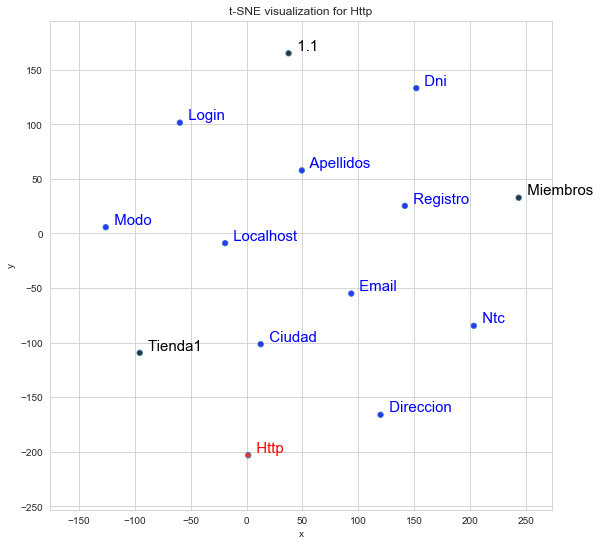

In [159]:
tsnescatterplot(w2v_model, 'http', ['tienda1','1.1','miembros'])

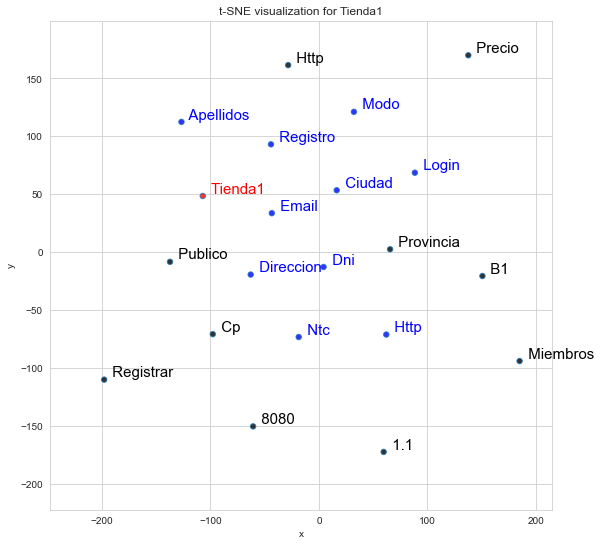

In [160]:
tsnescatterplot(w2v_model, 'tienda1', [i[0] for i in w2v_model.wv.most_similar(negative=["tienda1"])])


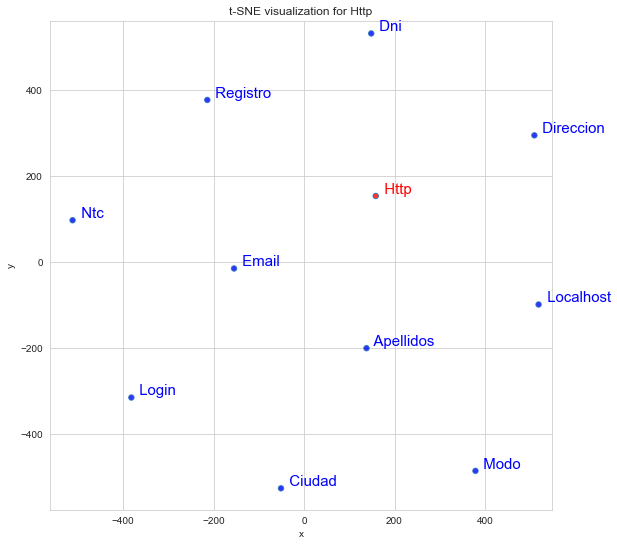

In [161]:
tsnescatterplot(w2v_model, "http", [t[0] for t in w2v_model.wv.most_similar(positive=["tienda1"], topn=5)][15:])